In [1]:
# Start loading libraries

#! pip install yfinance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#! pip install pmdarima
import pmdarima as pm
from pmdarima import model_selection

import scipy
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_acf

#from matplotlib.ticker import NullFormatter
#import yfinance as yf
#import warnings; warnings.simplefilter('ignore')
#%matplotlib inline

In [2]:
xls_file = pd.ExcelFile("Data_monthly_final.xlsx") # Read Excel
df1=xls_file.parse("WTI") # Read the first sheet (Portfolio holdings)

#df1["Timestamp"] = df1["Date"].astype('datetime64[ns]') # Convert column to date format
df1 = df1.set_index(['Timestamp']) # use first column as index

#df1.to_excel("values.xlsx")  #print to excel


df1.describe()

,CLc1,CLc3,CLc6,CLc9,CLc12
count,478.000000,478.000000,478.000000,470.000000,448.000000
mean,44.985314,45.026611,44.838996,44.826617,45.750982
std,28.912733,28.987686,28.937955,29.002850,29.025216
min,10.420000,10.790000,11.330000,11.680000,11.750000
25%,20.300000,20.055000,20.050000,19.817500,19.922500
50%,31.290000,30.745000,30.015000,29.255000,32.815000
75%,65.830000,65.772500,66.482500,66.987500,68.342500
max,140.000000,140.950000,141.560000,141.460000,140.870000


<AxesSubplot:xlabel='Timestamp'>

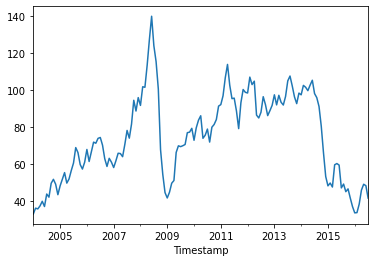

In [3]:
spot = df1["CLc1"]
#spot = np.log(spot)
spot = spot.loc['2004-01-31':'2022-11-30']
spot_train = spot.loc[:'2016-07-31']
spot_train.plot()

In [4]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot_train.describe()
#spot.dropna().describe()

count    151.000000
mean      74.439536
std       23.389293
min       33.050000
25%       53.850000
50%       73.930000
75%       94.975000
max      140.000000
Name: CLc1, dtype: float64

In [5]:
print("Skewness spot:", scipy.stats.skew(spot_train.dropna(), axis=0, bias=True))
print("Skewness logs:", scipy.stats.skew(np.log(spot_train.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot_train.dropna(), axis=0, fisher=False, bias=True))
print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot_train.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot_train.dropna()))
print("JB logs:", scipy.stats.jarque_bera(np.log(spot_train.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot_train.dropna(), lags=[6]))
print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot_train.dropna()), lags=[6]))

Skewness spot: -0.4075406681965278
Skewness logs: -0.5323824102153156
Kurtosis spot: 2.188617437578129
Kurtosis logs: 2.3277786679778982
JB spot: Jarque_beraResult(statistic=8.321982765763508, pvalue=0.015592092521567236)
JB logs: Jarque_beraResult(statistic=9.976102164578696, pvalue=0.006818941105603327)
Q(6) spot:       lb_stat      lb_pvalue
6  513.856714  8.697752e-108
Q(6) logs:       lb_stat      lb_pvalue
6  510.780476  4.001368e-107


In [6]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot_train.dropna()))
print("ADF logs:", adfuller(np.log(spot_train.dropna())))

print("PP spot:", PhillipsPerron(spot_train.dropna()).summary().as_text())
print("PP logs:", PhillipsPerron(np.log(spot_train.dropna())).summary().as_text())



ADF spot: (-2.4110012909165355, 0.13865542030338074, 1, 149, {'1%': -3.4750180242954167, '5%': -2.8811408028842043, '10%': -2.577221358046935}, -265.5673426933431)
ADF logs: (-2.4207823781720843, 0.13595644069835505, 1, 149, {'1%': -3.4750180242954167, '5%': -2.8811408028842043, '10%': -2.577221358046935}, -656.7321725221977)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.349
P-value                         0.157
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
PP logs:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.422
P-value                         0.136
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The proc

In [7]:

print("KPSS spot:", KPSS(spot_train.dropna()).summary().as_text())
print("KPSS logs:", KPSS(np.log(spot_train.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  0.359
P-value                         0.093
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
KPSS logs:     KPSS Stationarity Test Results   
Test Statistic                  0.357
P-value                         0.094
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:
ACF and PACF logs:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


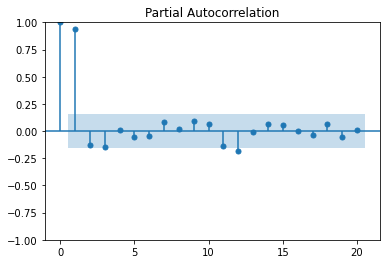

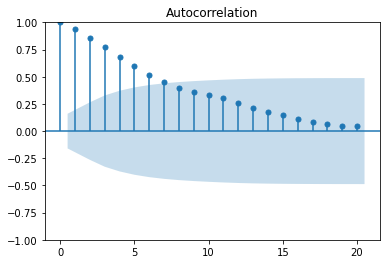

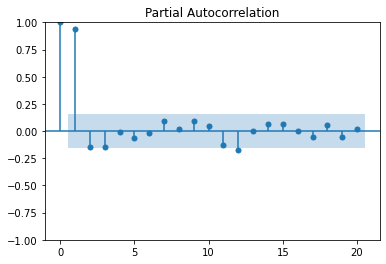

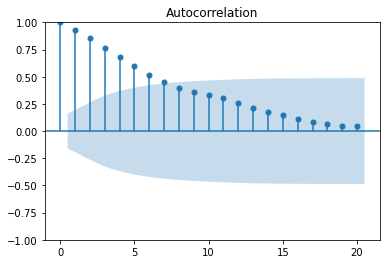

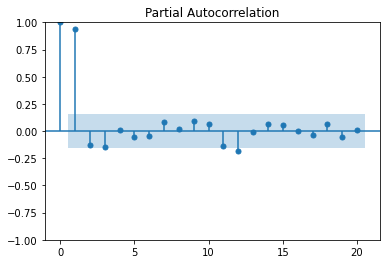

In [8]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot_train.dropna(), lags = 20)
plot_pacf(spot_train.dropna(), lags = 20)


print("ACF and PACF logs:")
plot_acf(np.log(spot_train.dropna()), lags = 20)
plot_pacf(np.log(spot_train.dropna()), lags = 20)



0.6782943507735172

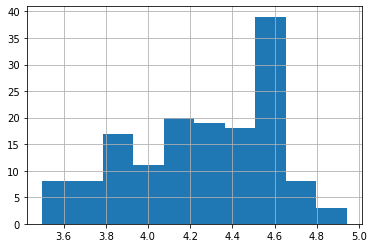

In [9]:
spot_train.hist()
0.6782943507735172

<AxesSubplot:>

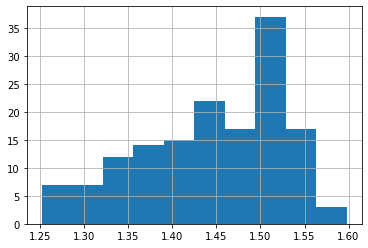

In [10]:
np.log(spot_train).hist()

In [11]:
# Load the data and split it into separate pieces
data = np.array(spot.dropna())
train, test = model_selection.train_test_split(data, train_size=(spot_train.shape[0]))
#train, test = model_selection.train_test_split(data, train_size=(spot.shape[0]-1))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-282.328, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-276.896, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-285.697, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-283.207, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-278.857, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-284.745, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-284.255, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-276.490, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-287.678, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-286.731, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-286.239, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-285.369, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-278.663, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.428 seconds


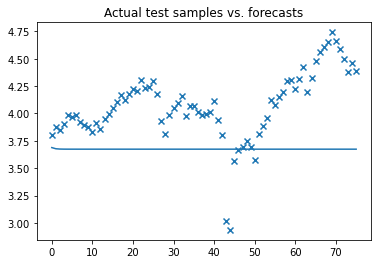

In [12]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [13]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  151
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 145.839
Date:                Fri, 06 Jan 2023   AIC                           -287.678
Time:                        21:11:05   BIC                           -281.657
Sample:                             0   HQIC                          -285.232
                                - 151                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2661      0.078      3.424      0.001       0.114       0.418
sigma2         0.0084      0.001     10.054      0.000       0.007       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 7.87
Prob(Q):                              0.78   Prob(JB):                         0.02
Heteroskedasticity (H):               1.01   Skew:                            -0.29
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

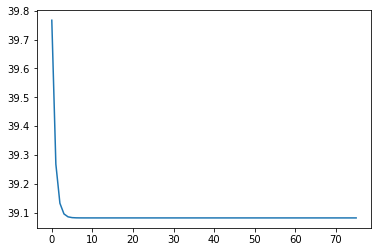

In [14]:
plt.plot(x, arima.predict(n_periods=test.shape[0]))

In [15]:
arima.predict(n_periods=test.shape[0])

array([39.76728659, 39.26820213, 39.13229146, 39.09528027, 39.08520139,
       39.0824567 , 39.08170927, 39.08150573, 39.0814503 , 39.08143521,
       39.0814311 , 39.08142998, 39.08142968, 39.08142959, 39.08142957,
       39.08142956, 39.08142956, 39.08142956, 39.08142956, 39.08142956,
       39.08142956, 39.08142956, 39.08142956, 39.08142956, 39.08142956,
       39.08142956, 39.08142956, 39.08142956, 39.08142956, 39.08142956,
       39.08142956, 39.08142956, 39.08142956, 39.08142956, 39.08142956,
       39.08142956, 39.08142956, 39.08142956, 39.08142956, 39.08142956,
       39.08142956, 39.08142956, 39.08142956, 39.08142956, 39.08142956,
       39.08142956, 39.08142956, 39.08142956, 39.08142956, 39.08142956,
       39.08142956, 39.08142956, 39.08142956, 39.08142956, 39.08142956,
       39.08142956, 39.08142956, 39.08142956, 39.08142956, 39.08142956,
       39.08142956, 39.08142956, 39.08142956, 39.08142956, 39.08142956,
       39.08142956, 39.08142956, 39.08142956, 39.08142956, 39.08

<AxesSubplot:xlabel='Timestamp'>

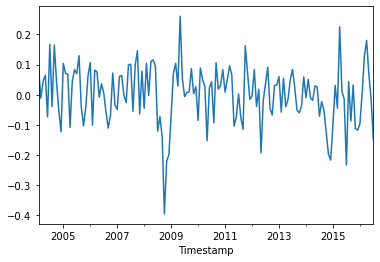

In [16]:
spot2 = np.log(spot).diff()
#spot2 = spot.diff()
spot_train2 = spot2.loc[:'2016-07-31'].dropna()
spot_train2.plot()


In [32]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot_train2.describe()
#spot.dropna().describe()

count    150.000000
mean       0.001534
std        0.095187
min       -0.394840
25%       -0.056638
50%        0.009037
75%        0.067856
max        0.260165
Name: CLc1, dtype: float64

In [33]:
print("Skewness spot:", scipy.stats.skew(spot_train2.dropna(), axis=0, bias=True))
#print("Skewness logs:", scipy.stats.skew(np.log(spot2.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot_train2.dropna(), axis=0, fisher=False, bias=True))
#print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot2.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot_train2.dropna()))
#print("JB logs:", scipy.stats.jarque_bera(np.log(spot2.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot_train2.dropna(), lags=[6]))
#print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot2.dropna()), lags=[6]))

Skewness spot: -0.5995525957970776
Kurtosis spot: 4.4704150669135565
JB spot: Jarque_beraResult(statistic=22.49983580946533, pvalue=1.3008365535527311e-05)
Q(6) spot:      lb_stat  lb_pvalue
6  19.551689   0.003327


In [34]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot_train2.dropna()))
#print("ADF logs:", adfuller(np.log(spot2.dropna())))

print("PP spot:", PhillipsPerron(spot_train2.dropna()).summary().as_text())
#print("PP logs:", PhillipsPerron(np.log(spot2.dropna())).summary().as_text())

ADF spot: (-9.175071632409914, 2.3320319749442467e-15, 0, 149, {'1%': -3.4750180242954167, '5%': -2.8811408028842043, '10%': -2.577221358046935}, -261.7736041784876)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -8.840
P-value                         0.000
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.48 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [20]:
print("KPSS spot:", KPSS(spot_train2.dropna()).summary().as_text())
#print("KPSS logs:", KPSS(np.log(spot2.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  0.256
P-value                         0.181
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


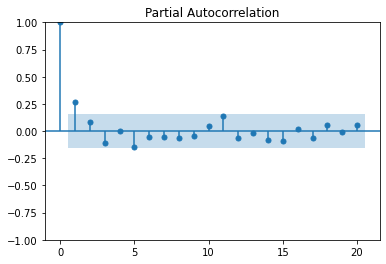

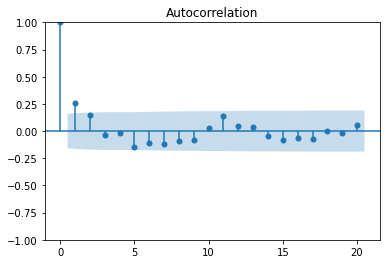

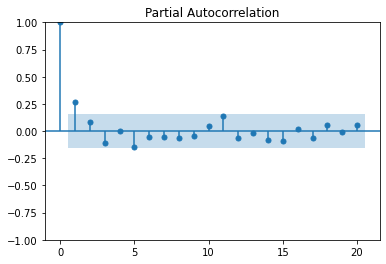

In [21]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot_train2.dropna(), lags = 20)
plot_pacf(spot_train2.dropna(), lags = 20)


#print("ACF and PACF logs:")
#plot_acf(np.log(spot2.dropna()), lags = 15)
#plot_pacf(np.log(spot2.dropna()), lags = 15)


<AxesSubplot:>

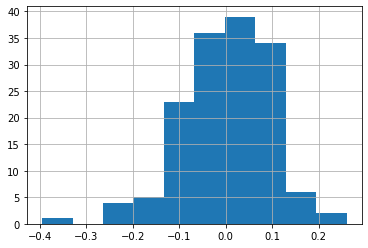

In [22]:
spot_train2.hist()


In [23]:
# Load the data and split it into separate pieces
data2 = np.array(spot2.dropna())
train2, test2 = model_selection.train_test_split(data2, train_size=(spot_train2.shape[0]))

In [24]:
train2

array([ 0.08993197, -0.01112359,  0.04430585,  0.06473914, -0.07360659,
        0.16736547, -0.03911113,  0.16427427,  0.04182069, -0.0521478 ,
       -0.12285899,  0.10374817,  0.07106541,  0.06815516, -0.10817233,
        0.04425936,  0.08357401,  0.06955908,  0.12943684, -0.03995205,
       -0.10294797, -0.04168694,  0.06287978,  0.10680116, -0.10075785,
        0.08158224,  0.07584314, -0.008242  ,  0.03636263,  0.00633724,
       -0.0572533 , -0.11049751, -0.06875446,  0.07224542, -0.03350289,
       -0.04883931,  0.06088764,  0.06394156, -0.00243198, -0.0262118 ,
        0.09912333,  0.10123487, -0.05479203,  0.0979588 ,  0.14635296,
       -0.06354462,  0.07876721, -0.04507235,  0.10433547, -0.00255629,
        0.11060369,  0.11548885,  0.09470322, -0.1207159 , -0.07200237,
       -0.13737436, -0.39484012, -0.2197942 , -0.19918161, -0.06771246,
        0.07129349,  0.1038849 ,  0.02897603,  0.26016491,  0.05258186,
       -0.00631551,  0.00731658,  0.00924813,  0.08663364,  0.00

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-284.437, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-278.857, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-287.678, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-285.369, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-286.731, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-286.239, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-278.664, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-285.697, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.162 seconds


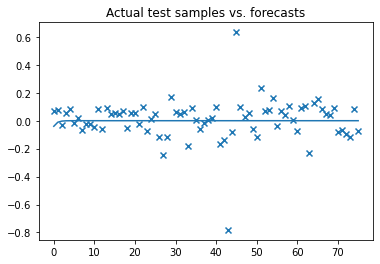

In [25]:
# Fit a simple auto_arima model
arima2 = pm.auto_arima(train2, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x2 = np.arange(test2.shape[0])
plt.scatter(x2, test2, marker='x')
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [26]:
arima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 145.839
Date:                Fri, 30 Dec 2022   AIC                           -287.678
Time:                        20:51:01   BIC                           -281.657
Sample:                             0   HQIC                          -285.232
                                - 150                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2661      0.078      3.424      0.001       0.114       0.418
sigma2         0.0084      0.001     10.054      0.000       0.007       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 7.87
Prob(Q):                              0.78   Prob(JB):                         0.02
Heteroskedasticity (H):               1.01   Skew:                            -0.29
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

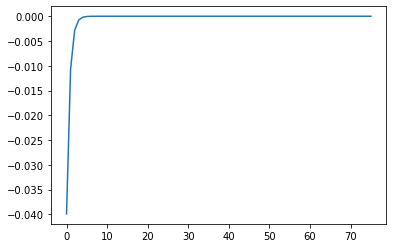

In [27]:
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))

In [28]:
tests = arima2.predict(n_periods=test2.shape[0])
tests

array([-3.99028608e-02, -1.06182973e-02, -2.82556778e-03, -7.51893927e-04,
       -2.00081726e-04, -5.32424795e-05, -1.41680187e-05, -3.77016162e-06,
       -1.00325381e-06, -2.66969510e-07, -7.10415637e-08, -1.89044201e-08,
       -5.03053538e-09, -1.33864388e-09, -3.56218035e-10, -9.47909229e-11,
       -2.52242115e-11, -6.71225501e-12, -1.78615562e-12, -4.75302549e-13,
       -1.26479748e-13, -3.36567238e-14, -8.95617739e-15, -2.38327158e-15,
       -6.34197291e-16, -1.68762220e-16, -4.49082445e-17, -1.19502482e-17,
       -3.18000479e-18, -8.46210914e-19, -2.25179821e-19, -5.99211746e-20,
       -1.59452439e-20, -4.24308775e-21, -1.12910118e-21, -3.00457957e-22,
       -7.99529620e-23, -2.12757758e-23, -5.66156181e-24, -1.50656232e-24,
       -4.00901747e-25, -1.06681422e-25, -2.83883169e-26, -7.55423503e-27,
       -2.01020959e-27, -5.34924129e-28, -1.42345269e-28, -3.78785970e-29,
       -1.00796333e-29, -2.68222731e-30, -7.13750504e-31, -1.89931622e-31,
       -5.05414996e-32, -

In [1]:
cum_res = np.exp(tests.cumsum())*spot.iloc[spot_train.shape[0]-1]
#cum_res = tests.cumsum()+spot.iloc[spot_train.shape[0]-1]
plt.figure(figsize=(10,5))
plt.plot(cum_res, color='g',label = 'NAV Returns')
plt.legend()
plt.show()

NameError: name 'np' is not defined

In [30]:
cum_res

array([39.9727234 , 39.55052661, 39.43893165, 39.4092889 , 39.40140461,
       39.39930684, 39.39874863, 39.39860009, 39.39856057, 39.39855005,
       39.39854725, 39.39854651, 39.39854631, 39.39854625, 39.39854624,
       39.39854624, 39.39854624, 39.39854624, 39.39854624, 39.39854624,
       39.39854624, 39.39854624, 39.39854624, 39.39854624, 39.39854624,
       39.39854624, 39.39854624, 39.39854624, 39.39854624, 39.39854624,
       39.39854624, 39.39854624, 39.39854624, 39.39854624, 39.39854624,
       39.39854624, 39.39854624, 39.39854624, 39.39854624, 39.39854624,
       39.39854624, 39.39854624, 39.39854624, 39.39854624, 39.39854624,
       39.39854624, 39.39854624, 39.39854624, 39.39854624, 39.39854624,
       39.39854624, 39.39854624, 39.39854624, 39.39854624, 39.39854624,
       39.39854624, 39.39854624, 39.39854624, 39.39854624, 39.39854624,
       39.39854624, 39.39854624, 39.39854624, 39.39854624, 39.39854624,
       39.39854624, 39.39854624, 39.39854624, 39.39854624, 39.39

In [31]:
train

array([ 33.05,  36.16,  35.76,  37.38,  39.88,  37.05,  43.8 ,  42.12,
        49.64,  51.76,  49.13,  43.45,  48.2 ,  51.75,  55.4 ,  49.72,
        51.97,  56.5 ,  60.57,  68.94,  66.24,  59.76,  57.32,  61.04,
        67.92,  61.41,  66.63,  71.88,  71.29,  73.93,  74.4 ,  70.26,
        62.91,  58.73,  63.13,  61.05,  58.14,  61.79,  65.87,  65.71,
        64.01,  70.68,  78.21,  74.04,  81.66,  94.53,  88.71,  95.98,
        91.75, 101.84, 101.58, 113.46, 127.35, 140.  , 124.08, 115.46,
       100.64,  67.81,  54.43,  44.6 ,  41.68,  44.76,  49.66,  51.12,
        66.31,  69.89,  69.45,  69.96,  70.61,  77.  ,  77.28,  79.36,
        72.89,  79.66,  83.76,  86.15,  73.97,  75.63,  78.95,  71.92,
        79.97,  81.43,  84.11,  91.38,  92.19,  96.97, 106.72, 113.93,
       102.7 ,  95.42,  95.7 ,  88.81,  79.2 ,  93.19, 100.36,  98.83,
        98.48, 107.07, 103.02, 104.87,  86.53,  84.96,  88.06,  96.47,
        92.19,  86.24,  88.91,  91.82,  97.49,  92.05,  97.23,  93.46,
      

In [28]:
#cointegration tests

#normalized cv
#LR test

In [29]:
#correlaatiomatriisi

In [30]:
#np.argwhere(np.isnan(x))